In [1]:
import datetime
start_time = datetime.datetime.now(); print(start_time)

2018-11-30 20:28:55.236972


In [2]:
%matplotlib inline

In [3]:
secret = False #Will be put to True for a CASD export

In [4]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd ; pd.set_option("display.max_columns",1000)
import pickle

In [5]:
import pickle
pickle_year_variable_path = "C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Program/Program_only_married_couples/year_variable/"
year =  pickle.load(open(pickle_year_variable_path+"year_variable.p",'rb')); print(year)

2011


In [6]:
store_path = 'C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Data/hdf/edp_2016_final.h5'
reaction_store_path = 'C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Data/hdf/reaction.h5'
pickles_path = 'C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Data/pickles/{}'.format(year)
Store = pd.HDFStore(store_path)

In [7]:
Store

<class 'pandas.io.pytables.HDFStore'>
File path: C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Data/hdf/edp_2016_final.h5

In [8]:
for key in Store.keys(): print(key)
Store.close()

/DECES
/DESCENDANCE
/EAR2004_FAMILLE
/EAR2004_INDIVIDU
/EAR2004_LOGEMENT
/EAR2005_FAMILLE
/EAR2005_INDIVIDU
/EAR2005_LOGEMENT
/EAR2006_FAMILLE
/EAR2006_INDIVIDU
/EAR2006_LOGEMENT
/EAR2007_FAMILLE
/EAR2007_INDIVIDU
/EAR2007_LOGEMENT
/EAR2008_FAMILLE
/EAR2008_INDIVIDU
/EAR2008_LOGEMENT
/EAR2009_FAMILLE
/EAR2009_INDIVIDU
/EAR2009_LOGEMENT
/EAR2010_FAMILLE
/EAR2010_INDIVIDU
/EAR2010_LOGEMENT
/EAR2011_FAMILLE
/EAR2011_INDIVIDU
/EAR2011_LOGEMENT
/EAR2012_FAMILLE
/EAR2012_INDIVIDU
/EAR2012_LOGEMENT
/EAR2013_FAMILLE
/EAR2013_INDIVIDU
/EAR2013_LOGEMENT
/EAR2014_FAMILLE
/EAR2014_INDIVIDU
/EAR2014_LOGEMENT
/EAR2015_FAMILLE
/EAR2015_INDIVIDU
/EAR2015_LOGEMENT
/EAR2016_FAMILLE
/EAR2016_INDIVIDU
/EAR2016_LOGEMENT
/FE
/FISC_INDIVIDU_2011
/FISC_INDIVIDU_2012
/FISC_INDIVIDU_2013
/FISC_INDIVIDU_2014
/FISC_INDIVIDU_2015
/FISC_INDIVIDU_2016
/FISC_LOGEMENT_2011
/FISC_LOGEMENT_2012
/FISC_LOGEMENT_2013
/FISC_LOGEMENT_2014
/FISC_LOGEMENT_2015
/FISC_LOGEMENT_2016
/FISC_REVDET_2011
/FISC_REVDET_2012
/FISC_REVDE

In [9]:
result_path = u"C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Program/Program_only_married_couples/hdf_married_couples/"

In [10]:
fiscr = pd.read_hdf(result_path+"married_couples_step_3.h5", "fiscr")

In [11]:
fiscr.shape

(789743, 313)

In [12]:
dads = pd.read_hdf( store_path,"PANACT".format(year+1))

In [13]:
dads2 = dads[dads.AN.isin([2014,2011])]

In [14]:
del(dads)

In [15]:
dads_2014 = dads2[dads2.AN == 2014]
dads_2011 = dads2[dads2.AN == 2011]

In [16]:
dads_merge = pd.merge(dads_2014,dads_2011, on = "ID_DIFF", suffixes = ["_2014", "_2011"])

In [17]:
dads_merge_col = dads_merge.columns

In [18]:
dads_merge_father  = dads_merge.copy()
dads_merge_mother  = dads_merge.copy()

In [19]:
dads_merge_father.columns = ["{}_father".format(col) for col in dads_merge_col]


In [20]:
merge_dads_fiscr = pd.merge(fiscr, dads_merge_father, on = "ID_DIFF_father", how = "left")

In [21]:
dads_merge_mother.columns = ["{}_mother".format(col) for col in dads_merge_col]

In [22]:
%%time
merge_dads_fiscr = pd.merge(merge_dads_fiscr, dads_merge_mother, on = "ID_DIFF_mother", how = "left")

Wall time: 1min 7s


In [ ]:
merge_dads_fiscr.head()#[:0]

In [22]:
print(dads_merge_mother.ENTPAN_2014_mother.isnull().value_counts())
print(dads_merge_father.ENTPAN_2014_father.isnull().value_counts())

False    1097336
Name: ENTPAN_2014_mother, dtype: int64
False    1097336
Name: ENTPAN_2014_father, dtype: int64


In [23]:
dads_merge_mother.ENTPAN_2014_mother.value_counts(dropna = False)

2002    623442
2006    135184
2007     47583
2009     42972
2008     37895
2011     36045
2010     30852
2003     14485
2004     11961
2005     11902
1991      6278
1982      5895
1978      5492
1984      5167
1994      5072
1992      4381
1995      4304
1999      4164
1993      4137
2001      4065
1980      4011
2000      3901
1998      3821
1997      3807
1989      3616
1988      3538
1986      3533
1996      3459
1985      3365
1987      2926
1979      2725
1976      2510
1977      2452
1975      2187
1974      2068
1973      1861
1972      1434
1971      1252
1967       966
1983       850
1970       789
1969       555
1968       434
Name: ENTPAN_2014_mother, dtype: int64

In [24]:
merge_dads_fiscr["Is_in_DADS_mother"] = ~merge_dads_fiscr.ENTPAN_2014_mother.isnull()
merge_dads_fiscr["Is_in_DADS_father"] = ~merge_dads_fiscr.ENTPAN_2014_father.isnull()
merge_dads_fiscr["Is_in_DADS_both_parents"] = (merge_dads_fiscr["Is_in_DADS_mother"]
                                               &merge_dads_fiscr["Is_in_DADS_father"])

In [25]:
print(merge_dads_fiscr["Is_in_DADS_mother"] .value_counts() )
print(merge_dads_fiscr["Is_in_DADS_father"] .value_counts() )
print(merge_dads_fiscr["Is_in_DADS_both_parents"] .value_counts() )

False    656827
True     132916
Name: Is_in_DADS_mother, dtype: int64
False    658158
True     131585
Name: Is_in_DADS_father, dtype: int64
False    785702
True       4041
Name: Is_in_DADS_both_parents, dtype: int64


In [27]:
df_plots= merge_dads_fiscr[~(merge_dads_fiscr.NETNETR_2011_father.isnull()
                  |merge_dads_fiscr.YSALI_2011_father.isnull() )][["NETNETR_2011_father", "YSALI_2011_father"]]

In [28]:
df_plots = df_plots.query("50_000<NETNETR_2011_father<200_000")

(50000, 200000)

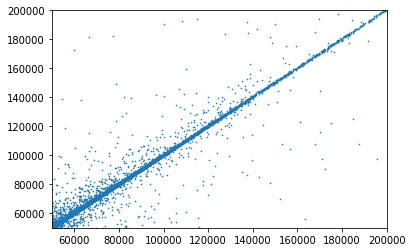

In [29]:
plt.scatter(df_plots.NETNETR_2011_father, df_plots.YSALI_2011_father, s =0.4)
plt.xlim(50_000,200_000)
plt.ylim(50_000,200_000)
    

(0, 2800)

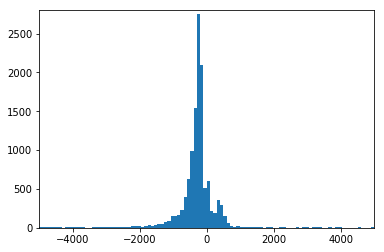

In [30]:
plt.hist(df_plots.NETNETR_2011_father- df_plots.YSALI_2011_father, bins = 10000);
plt.xlim(-5000,5000)
plt.ylim(0,2800)

In [31]:
merge_dads_fiscr.shape

(789743, 436)

In [32]:
merge_dads_fiscr.describe(percentiles = [0.01,0.1,0.25,0.5,0.75,0.9,0.99 ]).drop(["min", "max"])

,AN_FISC_2011,AN_REVENU_2011,REG_2011,TU10_2011,NBFOYM_2011,NBPERSM_2011,INF14M_2011,SUP14M_2011,NBERAM_2011,NB_UC_2011,AGERF_2011,SEXERF_2011,OCCTYP_2011,TYPMEN9_2011,NB_ALLOC_CNAF_2011,NB_ALLOC_CNAV_2011,NB_ALLOC_MSAF_2011,NB_ALLOC_MSAV_2011,NIVVIEM_2011,CENTILE_2011,REVDISPM_2011,REVPERM_2011,REVINIM_2011,REVDECM_2011,ZTSAM_2011,ZSALM_2011,ZCHOM_2011,ZPERM_2011,ZRETM_2011,ZRSTM_2011,ZALRM_2011,ZRTOM_2011,ZRAGM_2011,ZRICM_2011,ZRNCM_2011,ZFONM_2011,ZVAMM0_2011,ZVAMM_2011,ZVALM0_2011,ZVALM_2011,ZRACM_2011,ZETRM_2011,ZALVM_2011,PSOCM_2011,PFAMM_2011,M_PNAM_2011,M_PAJEM_2011,M_CLCAM_2011,M_COLCAM_2011,M_AFM_2011,M_CFM_2011,M_ARSM_2011,M_AEEHM_2011,M_ASFM_2011,MINIM_2011,M_MINVM_2011,M_RSAM_2011,M_RSA_ACTM_2011,M_RSA_SOCM_2011,M_RSA_PFAM_2011,M_AAH_CAAHM_2011,LOGTM_2011,M_ALFM_2011,M_APLM_2011,M_ALSM_2011,M_ALSETM_2011,M_PPEM_2011,ZIMPOM_2011,ZIMPVALM_2011,ZTHABM_2011,CSGIM_2011,CSGISALM_2011,CRDSM_2011,CRDSSALM_2011,CSGPATM_2011,CSGVALM_2011,CSGIMPM_2011,CSGDM_2011,CSGDSALM_2011,PRODUITFIN_2011,ZPPEM_2011,ZQUOM_2011,ZDIVM_2011,ZGLOM_2011,ZAVFM_2011,ZIMPFORM_2011,NBPAC_2011,GARDEM_2011,SERVDOMM_2011,ZIMPOM_DECL_2011,ZIMPOM_ANC_2011,ZIMPOM_ANC_DECL_2011,ZAVFM_DECL_2011,ZTHABM_DECL_2011,AN_FISC_2014,AN_REVENU_2014,REG_2014,TU10_2014,NBFOYM_2014,NBPERSM_2014,INF14M_2014,SUP14M_2014,NBERAM_2014,NB_UC_2014,AGERF_2014,SEXERF_2014,OCCTYP_2014,TYPMEN9_2014,I_CHAMPM_2014,NB_ALLOC_CNAF_2014,NB_ALLOC_CNAV_2014,NB_ALLOC_MSAF_2014,NB_ALLOC_MSAV_2014,NIVVIEM_2014,CENTILE_2014,REVDISPM_2014,REVPERM_2014,REVINIM_2014,REVDECM_2014,ZTSAM_2014,ZSALM_2014,ZCHOM_2014,ZPERM_2014,ZRETM_2014,ZRSTM_2014,ZALRM_2014,ZRTOM_2014,ZRAGM_2014,ZRICM_2014,ZRNCM_2014,ZFONM_2014,ZVAMM0_2014,ZVAMM_2014,ZVALM0_2014,ZVALM_2014,ZRACM_2014,ZETRM_2014,ZALVM_2014,PSOCM_2014,PFAMM_2014,M_PNAM_2014,M_PAJEM_2014,M_CLCAM_2014,M_COLCAM_2014,M_AFM_2014,M_CFM_2014,M_ARSM_2014,M_AEEHM_2014,M_ASFM_2014,MINIM_2014,M_MINVM_2014,M_RSAM_2014,M_RSA_ACTM_2014,M_RSA_SOCM_2014,M_RSA_PFAM_2014,M_AAH_CAAHM_2014,LOGTM_2014,M_ALFM_2014,M_APLM_2014,M_ALSM_2014,M_ALSETM_2014,M_PPEM_2014,ZIMPOM_2014,ZIMPVALM_2014,ZTHABM_2014,CSGIM_2014,CSGISALM_2014,CRDSM_2014,CRDSSALM_2014,CSGPATM_2014,CSGVALM_2014,CSGIMPM_2014,CSGDM_2014,CSGDSALM_2014,PRODUITFIN_2014,ZPPEM_2014,ZQUOM_2014,ZDIVM_2014,ZGLOM_2014,ZAVFM_2014,ZIMPFORM_2014,NBPAC_2014,GARDEM_2014,SERVDOMM_2014,ZIMPOM_DECL_2014,ZIMPOM_ANC_2014,ZIMPOM_ANC_DECL_2014,ZAVFM_DECL_2014,ZTHABM_DECL_2014,index,Age_father,Age_mother,REV_PRINC_2011_father,REV_PRINC_2011_mother,YSALI_2011_father,YSALI_2011_mother,YCHOI_2011_father,YCHOI_2011_mother,YRSTI_2011_father,YRSTI_2011_mother,YALRI_2011_father,YALRI_2011_mother,YRAGI_2011_father,YRAGI_2011_mother,YBICI_2011_father,YBICI_2011_mother,YBNCI_2011_father,YBNCI_2011_mother,AN_FISC_2014_father,AN_FISC_2014_mother,REV_PRINC_2014_father,REV_PRINC_2014_mother,YSALI_2014_father,YSALI_2014_mother,YCHOI_2014_father,YCHOI_2014_mother,YRSTI_2014_father,YRSTI_2014_mother,YALRI_2014_father,YALRI_2014_mother,YRAGI_2014_father,YRAGI_2014_mother,YBICI_2014_father,YBICI_2014_mother,YBNCI_2014_father,YBNCI_2014_mother,Age_eldest_child,Age_youngest_child,Age_child_mean,index_to_drop,AN_FISC_2011_to_drop,CNE_2011,DATACHEV_2011,HLMSEM_2011,DATEACTE_2011,DATEPERS_2011,LOGEMENT_2011,NBNIV_2011,SURFTOT_2011,NBPIEC_2011,NBPP_2011,NBSDB_2011,NBBAIG_2011,NBDOUC_2011,NBWC_2011,NBCUIS8_2011,NBCUIS9_2011,NBCH_2011,NBSAM_2011,NUM_IRIS_2011,NUM_QPV_2011,AN_FISC_2014_to_drop,CNE_2014,DATACHEV_2014,HLMSEM_2014,DATEACTE_2014,DATEPERS_2014,LOGEMENT_2014,NBNIV_2014,SURFTOT_2014,NBPIEC_2014,NBPP_2014,NBSDB_2014,NBBAIG_2014,NBDOUC_2014,NBWC_2014,NBCUIS8_2014,NBCUIS9_2014,NBCH_2014,NBSAM_2014,ID_EVT_DIFF_2014_father,AN_2014_father,ENTPAN_2014_father,NBENT_2014_father,REGR_2014_father,REGT_2014_father,CS1_ANC_2014_father,CS2_ANC_2014_father,CSK_2014_father,NETNET_2014_father,NETNETR_2014_father,DP_2014_father,DPC_2014_father,NBHEUR_2014_father,DOMEMPL_2014_father,NBSA_ENT_2014_father,NBSA_ET_2014_father,ID_EVT_DIFF_2011_father,AN_2011_father,ENTP

In [33]:
hello = merge_dads_fiscr.describe(percentiles = [0.01,0.1,0.25,0.5,0.75,0.9,0.99 ]).drop(["min", "max"])

In [34]:
((hello.loc["count", :]<1000)&(hello.loc["count", :]!=0)).value_counts()

False    338
Name: count, dtype: int64

In [35]:
merge_dads_fiscr.to_hdf(result_path+"married_couples_step_4.h5", "fiscr")

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\generic.py:1471: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block3_values] [items->['ID_FISC_LOG_DIFF', 'DEP_2011', 'DEPCOM_2011', 'I_CHAMPM_2011', 'I_PAUVRE50M_2011', 'I_PAUVRE60M_2011', 'DEP_2014', 'DEPCOM_2014', 'I_PAUVRE50M_2014', 'I_PAUVRE60M_2014', 'TYPE_FISC_2011', 'TYPE_FISC_2014', 'ID_DIFF_father', 'ID_DIFF_mother', 'DEP_2011_to_drop', 'SECCAD_2011', 'OCC_2011', 'DNATLC_2011', 'NATLOC_2011', 'TAX_2011', 'NLOC4_2011', 'EAU_2011', 'EGOUT_2011', 'ELEC_2011', 'GAZ_2011', 'CHAUFF_2011', 'ASCENSEUR_2011', 'DEP_2014_to_drop', 'SECCAD_2014', 'OCC_2014', 'DNATLC_2014', 'NATLOC_2014', 'TAX_2014', 'NLOC4_2014', 'EAU_2014', 'EGOUT_2014', 'ELEC_2014', 'GAZ_2014', 'CHAUFF_2014', 'ASCENSEUR_2014', 'NUM_IRIS_2014', 'NUM_QPV_2014', 'DEPR_2014_father', 'COMR_2014_father'

In [39]:
stop_time = datetime.datetime.now(); print("now: ",stop_time);
execution_time = stop_time - start_time; print("execution_time: ",execution_time)

now:  2018-11-30 20:35:17.283437
execution_time:  0:06:22.046465


In [47]:
(merge_dads_fiscr.Age_youngest_child>20).value_counts(normalize = True)

False    0.981184
True     0.018816
Name: Age_youngest_child, dtype: float64